# Run CPM on Kepler stars by hand.

In [22]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from tess_stars2px import tess_stars2px_function_entry
import tess_rotation as tr
import eleanor
import lightkurve as lk
import starspot as ss

In [23]:
df = pd.read_csv("~/Downloads/Kepler_Tess.csv")
df = df.drop_duplicates(subset="TIC")
print(np.shape(df))
df.head()

(254, 171)


,Unnamed: 0,Unnamed: 0.1,KIDs_x,ra,dec,designation,TIC,MatchRa,MatchDEC,dstArcSec,...,provenance_name,s_region,jpegURL,dataURL,dataRights,mtFlag,srcDen,intentType,obsid,objID
0,0,201,3545104.0,291.565434,38.671523,Gaia DR2 2052740693844613760,137218741,291.565215,38.672069,2.060249,...,SPOC,CIRCLE ICRS 291.56521502 38.67206903 0.00138889,NaN,mast:TESS/product/tess2019198215352-s0014-0000...,PUBLIC,False,NaN,science,17000527880,17003189670
1,1,372,4489051.0,297.403196,39.576456,Gaia DR2 2073628081882172928,169456040,297.403222,39.576836,1.369403,...,SPOC,CIRCLE ICRS 297.40322214 39.57683635 0.00138889,NaN,mast:TESS/product/tess2019198215352-s0014-0000...,PUBLIC,False,NaN,science,17000532865,17003183022
3,3,1035,6611875.0,293.497058,42.060352,Gaia DR2 2077632567645823616,270608640,293.496577,42.059973,1.875803,...,SPOC,CIRCLE ICRS 293.49657685 42.05997250 0.00138889,NaN,mast:TESS/product/tess2019226182529-s0015-0000...,PUBLIC,False,NaN,science,17000561762,17003278948
5,5,1211,6671560.0,284.631030,42.159107,Gaia DR2 2104144507406725120,164730199,284.630852,42.159076,0.487288,...,SPOC,CIRCLE ICRS 284.63085160 42.15907596 0.00138889,NaN,mast:TESS/product/tess2019198215352-s0014-0000...,PUBLIC,False,NaN,science,17000535790,17003191662
6,6,1264,6679371.0,287.972834,42.107653,Gaia DR2 2102495759660459648,158632244,287.972841,42.107707,0.195909,...,SPOC,CIRCLE ICRS 287.97284072 42.10770693 0.00138889,NaN,mast:TESS/product/tess2019198215352-s0014-0000...,PUBLIC,False,NaN,science,17000536753,17003194364


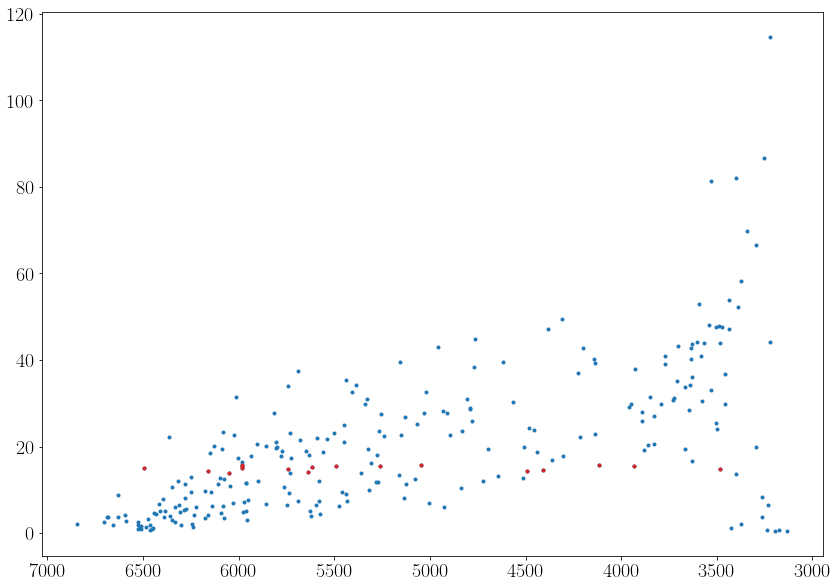

In [104]:
plt.plot(df.Teff, df.Prot, ".")
plt.gca().invert_xaxis()

m = (df.Prot.values < 16) & (df.Prot.values > 14)
plt.plot(df.Teff.values[m], df.Prot.values[m], "C3.")

In [25]:
ras = df.ra.values[m]
decs = df.dec.values[m]
ticids = df.TIC.values[m]

double_inds = []
for i in range(len(ras)):
    outID, outEclipLong, outEclipLat, outSec, outCam, outCcd, outColPix, outRowPix, scinfo = \
        tess_stars2px_function_entry(ticids[i], ras[i], decs[i])
    if len(outSec) > 1:
        if outSec[0] == 14 and outSec[1] == 15:
            print(outSec, outID[0])
            double_inds.append(i)

[14 15] 26474636
[14 15 26] 164668179
[14 15] 271668161
[14 15] 267671122
[14 15] 27083004
[14 15] 290033328
[14 15] 27776588
[14 15 26] 399827186
[14 15] 138221966
[14 15] 271769821
[14 15] 270520275
[14 15] 138637673
[14 15] 270517307


10.4412
399827186
14.378


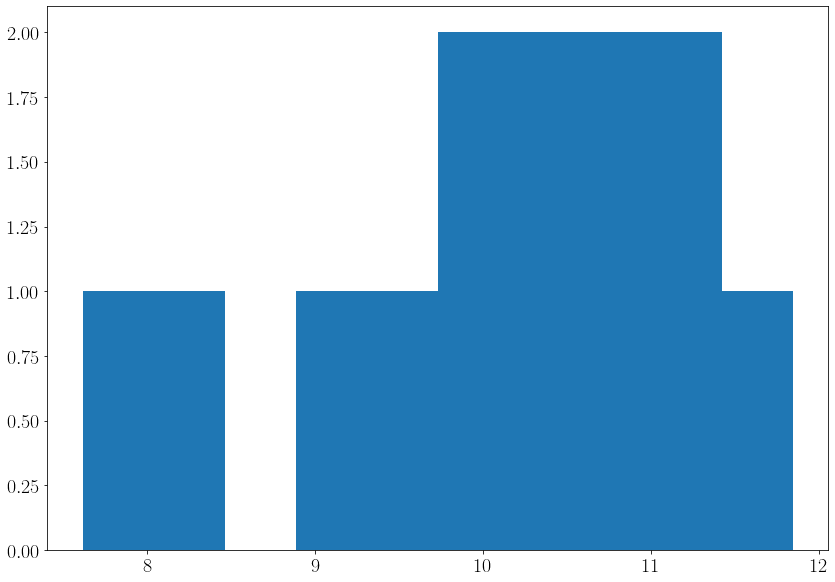

In [105]:
plt.hist(df.Tmag.values[m][double_inds]);

i = 7 #4  # 3 0
print(df.Tmag.values[m][double_inds][i])
print(df.TIC.values[m][double_inds][i])
print(df.Prot.values[m][double_inds][i])

In [75]:
ticid = df.TIC.values[m][double_inds][i]

In [76]:
tr.download_tess_cuts(ticid, lower_sector_limit=13, upper_sector_limit=16, tesscut_path="/Users/rangus/projects/TESS-rotation/data/TESScut")

No eleanor postcard has been made for your target (yet). Using TessCut instead.
Inflating...
Inflating...
No cached file found. Downloading /Users/rangus/projects/TESS-rotation/data/TESScut/astrocut_286.566507207955_48.1175039175814_68x68px/tess-s0014-2-3_286.566507_48.117504_68x68_astrocut.fits
Inflating...
No cached file found. Downloading /Users/rangus/projects/TESS-rotation/data/TESScut/astrocut_286.566507207955_48.1175039175814_68x68px/tess-s0015-2-3_286.566507_48.117504_68x68_astrocut.fits
Inflating...


In [77]:
sector = 14
star = eleanor.Source(tic=ticid, sector=sector, tc=True)
fits_file14 = tr.get_fits_filenames("/Users/rangus/projects/TESS-rotation/data/TESScut", sector, star.camera, star.chip, star.coords[0], star.coords[1])

sector = 15
star = eleanor.Source(tic=ticid, sector=sector, tc=True)
fits_file15 = tr.get_fits_filenames("/Users/rangus/projects/TESS-rotation/data/TESScut", sector, star.camera, star.chip, star.coords[0], star.coords[1])

Removing 4 bad data points (out of 1241) using the TESS provided QUALITY array
(1237, 68, 68) shape
[32, 37] [32, 37]


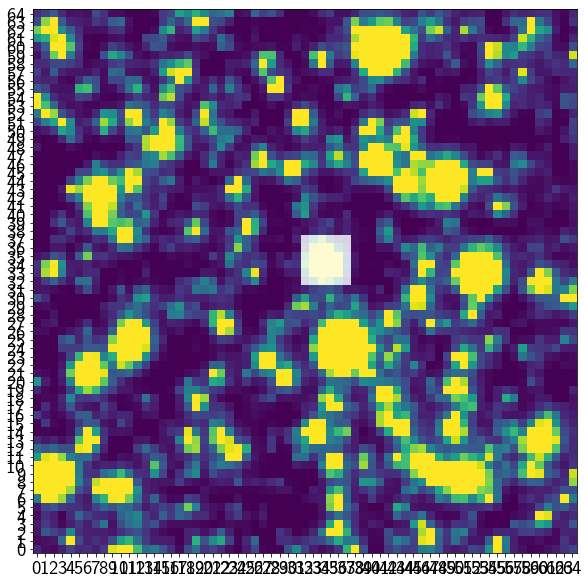

In [86]:
plt.rcParams["figure.figsize"] = (14, 10)
# i = 7
collims14, rowlims14, fig = tr.select_aperture(14, [32, 37], [32, 37], fits_file14, plot=True)
# i = 4
# collims14, rowlims14, fig = tr.select_aperture(14, [32, 35], [33, 35], fits_file14, plot=True)
# i = 3
# collims14, rowlims14, fig = tr.select_aperture(14, [34, 36], [32, 35], fits_file14, plot=True)
# i = 0
# collims14, rowlims14, fig = tr.select_aperture(14, [32, 37], [32, 37], fits_file14, plot=True)

Removing 7 bad data points (out of 1197) using the TESS provided QUALITY array
(1190, 68, 68) shape
[33, 38] [32, 37]


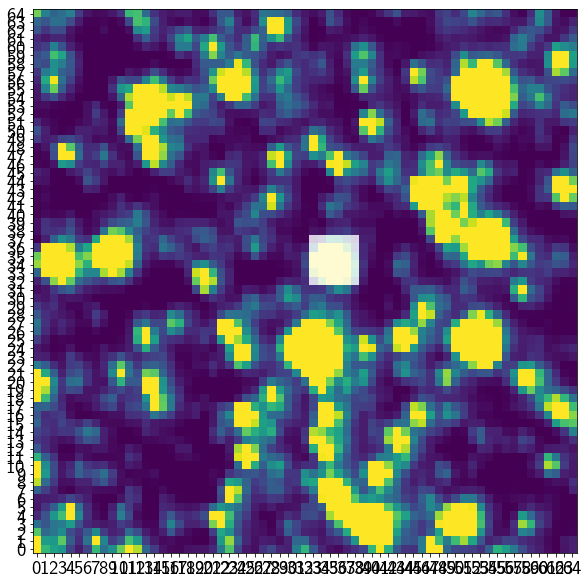

In [84]:
collims15, rowlims15, fig = tr.select_aperture(15, [33, 38], [32, 37], fits_file15, plot=True)
# collims15, rowlims15, fig = tr.select_aperture(15, [32, 35], [33, 35], fits_file15, plot=True)
# collims15, rowlims15, fig = tr.select_aperture(15, [32, 36], [32, 36], fits_file15, plot=True)
# collims15, rowlims15, fig = tr.select_aperture(15, [33, 37], [32, 37], fits_file15, plot=True)

In [87]:
x14, y14 = tr.make_lc_single_sector(14, collims14, rowlims14, fits_file14, plot=False, save_to_file=False)
x15, y15 = tr.make_lc_single_sector(15, collims15, rowlims15, fits_file15, plot=False, save_to_file=False)

Removing 4 bad data points (out of 1241) using the TESS provided QUALITY array
Summing over 6 x 6 pixel lightcurves
Summing over 6 x 6 pixel lightcurves
Summing over 6 x 6 pixel lightcurves
Summing over 6 x 6 pixel lightcurves
Removing 7 bad data points (out of 1197) using the TESS provided QUALITY array
Summing over 6 x 6 pixel lightcurves
Summing over 6 x 6 pixel lightcurves
Summing over 6 x 6 pixel lightcurves
Summing over 6 x 6 pixel lightcurves


In [88]:
time, flux, flux_err = tr.stitch_light_curve(ticid, [x14, x15], [y14, y15])

Fitting GP and offset model...


optimizing logp for variables: [step1, logrho, logsigma]
31it [00:00, 757.09it/s, logp=5.831207e+02] 
message: Optimization terminated successfully.
logp: 99.26538982222624 -> 583.1207308042302


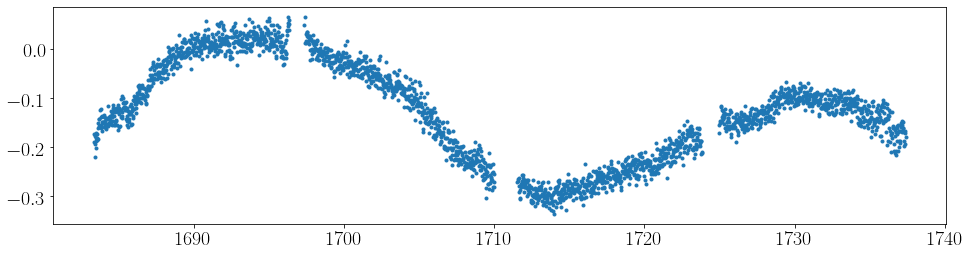

In [89]:
plt.figure(figsize=(16, 4))
plt.plot(time, flux, ".")

In [101]:
len(time)

2399

# Look at the PDC light curve.

In [90]:
tpf = lk.search_targetpixelfile('TIC {}'.format(ticid), sector=14).download()
lc14 = tpf.to_lightcurve(aperture_mask=tpf.pipeline_mask)
tpf = lk.search_targetpixelfile('TIC {}'.format(ticid), sector=15).download()
lc15 = tpf.to_lightcurve(aperture_mask=tpf.pipeline_mask)

In [99]:
med15 = np.median(lc15.flux)
med14 = np.median(lc14.flux)

time_pdc, flux_pdc, flux_err_pdc = tr.stitch_light_curve(ticid, [lc14.time, lc15.time], [lc14.flux/med14 - 1, lc15.flux/med15 - 1])

Fitting GP and offset model...


optimizing logp for variables: [step1, logrho, logsigma]
97it [00:00, 547.45it/s, logp=1.802220e+04] 
message: Desired error not necessarily achieved due to precision loss.
logp: 13953.977271490881 -> 18022.19925178344


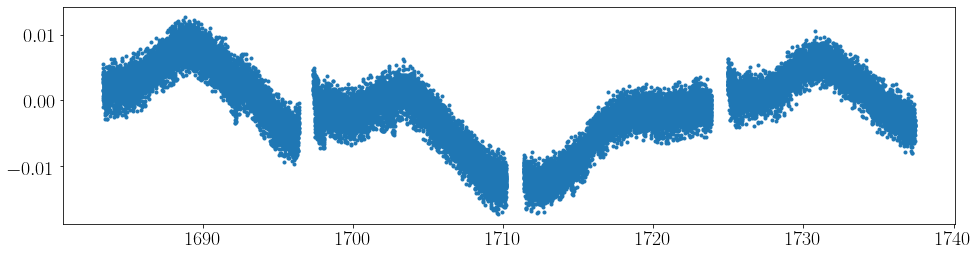

In [100]:
plt.figure(figsize=(16, 4))
plt.plot(time_pdc, flux_pdc, ".")

In [103]:
print(df.Prot.values[][i])

81.3967361


In [20]:
m = np.isfinite(lc.time) & np.isfinite(lc.flux)
rotate = ss.RotationModel(lc.time[m], lc.flux[m], np.ones_like(lc.flux[m]))
ls_period = rotate.ls_rotation()
print(ls_period)

33.69011522134627


In [ ]:
tpf15 = lk.search_targetpixelfile('TIC {}'.format(ticid), quarter=15).download()
lc15 = tpf.to_lightcurve(aperture_mask=tpf15.pipeline_mask)

In [ ]:
plt.figure(figsize=(16, 4))
plt.plot(lc14.time, lc14.flux, ".")
plt.plot(lc15.time, lc15.flux, ".")